# STAT306 Project Report
Group A3 (Chris Jung, Justin Lee, Tetiksha Jain, Ayush Vora)

# Introduction

This project aims to analyze wine quality data to predict the alcohol percentage, from 0 to 100, in wine based on different physicochemical properties. The quality of wine is a multifaceted attribute influenced by various physicochemical properties. This dataset includes 11 numerical predictors such as acidity, sugar content, and alcohol level, along with one categorical predictor representing the color of the wine (red or white). This project aim to analyze and create an accurate model to predict the alcohol percentage using multivariate linear regression for our analysis. This approach will allow us to quantify the influence of each predictor on the wine's quality and help us unravel the intricate patterns in the data. Understanding the relationship between these properties and the alcohol percentage could provide valuable insights for winemakers to refine optimize fermentation processes and enhance the desired characteristics of their wines. 

The wine quality data for this project is from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/186/wine+quality). It includes two datasets related to red and white "Vinho Verde" wine samples from the north of Portugal. The goal of these datasets is to model wine quality based on physicochemical tests, as described in the reference [Cortez et al., 2009].

## Variables

- Fixed acidity (g/dm³): Concentration of tartaric acid, affecting the wine's taste and preservation.
- Volatile acidity (g/dm³): Concentration of acetic acid, an indicator of wine spoilage.
- Citric acid (g/dm³): Concentration of citric acid, contributing to the wine's freshness.
- Residual sugar (g/dm³): Amount of sugar remaining after fermentation, impacting the sweetness of the wine.
- Chlorides (g/dm³): Concentration of sodium chloride, affecting the wine's saltiness.
- Free sulfur dioxide (mg/dm³): Amount of free sulfur dioxide, used as a preservative.
- Total sulfur dioxide (mg/dm³): Total amount of sulfur dioxide, used for preventing oxidation and maintaining freshness.
- Density (g/cm³): Density of the wine, related to the alcohol and sugar content.
- pH: Measure of the wine's acidity
- Sulphates (g/dm³): Concentration of potassium sulphate, contributing to the wine's sulfur dioxide levels and thus its preservation.
- Alcohol (% vol.): Alcohol content of the wine, expressed as a percentage of volume.
- Color: Categorical variable indicating whether the wine is red or white.
- Quality (score 0-10): Score based on sensory data, indicating the overall quality of the wine.


## EDA

In [1]:
# Load necessary libraries
library(ggplot2)
library(tidyverse)
library(leaps)
library(car)
# setting seed now so randomized samples will remain consistent
set.seed(123)

Warning message:
“package ‘stringr’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
# read data and assign colour fields
redwine_data <- read.csv("winequality-red.csv", header = TRUE, sep = ";")
redwine_data$colour <- "red"
whitewine_data <- read.csv("winequality-white.csv", header = TRUE, sep = ";")
whitewine_data$colour <- "white"

# Combine the two datasets and shuffle
combined_wine_data <- rbind(redwine_data, whitewine_data)
wine_data <- combined_wine_data[sample(nrow(combined_wine_data)), ]

head(wine_data, 4)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,colour
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
2463,6.2,0.28,0.33,1.7,0.029,24,111,0.99000,3.24,0.50,12.1,6,white
2511,6.2,0.33,0.19,5.6,0.042,22,143,0.99425,3.15,0.63,9.9,5,white
2227,7.0,0.32,0.24,6.2,0.048,31,228,0.99570,3.23,0.62,9.4,6,white
526,10.4,0.64,0.24,2.8,0.105,29,53,0.99980,3.24,0.67,9.9,5,red


In [3]:
# Function to calculate min, max, and mean
calculate_statistics <- function(data) {
  numeric_data <- data[sapply(data, is.numeric)]
  stats <- data.frame(
    Min = round(apply(numeric_data, 2, min), 2),
    Max = round(apply(numeric_data, 2, max), 2),
    Mean = round(apply(numeric_data, 2, mean), 2))
  stats$Feature <- rownames(stats)
  rownames(stats) <- NULL
  return(stats)}

# Calculate statistics for red and white wines
red_stats <- calculate_statistics(redwine_data[ , !(names(redwine_data) %in% c("color"))])
white_stats <- calculate_statistics(whitewine_data[ , !(names(whitewine_data) %in% c("color"))])

# Add units
units <- c(
  "g(tartaric acid)/dm^3", "g(acetic acid)/dm^3", "g/dm^3", "g/dm^3",
  "g(sodium chloride)/dm^3", "mg/dm^3", "mg/dm^3", "g/dm^3", "", 
  "g(potassium sulphate)/dm^3", "% vol", ""
)

# Add units to the statistics tables
red_stats$Unit <- units
white_stats$Unit <- units

# Reorder columns for readability
red_stats <- red_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]
white_stats <- white_stats[, c("Feature", "Unit", "Min", "Max", "Mean")]

# Print the statistics tables for red and white wines
cat("Red Wine Statistics\n")
print(red_stats)

cat("\nWhite Wine Statistics\n")
print(white_stats)

Red Wine Statistics
                Feature                       Unit  Min    Max  Mean
1         fixed.acidity      g(tartaric acid)/dm^3 4.60  15.90  8.32
2      volatile.acidity        g(acetic acid)/dm^3 0.12   1.58  0.53
3           citric.acid                     g/dm^3 0.00   1.00  0.27
4        residual.sugar                     g/dm^3 0.90  15.50  2.54
5             chlorides    g(sodium chloride)/dm^3 0.01   0.61  0.09
6   free.sulfur.dioxide                    mg/dm^3 1.00  72.00 15.87
7  total.sulfur.dioxide                    mg/dm^3 6.00 289.00 46.47
8               density                     g/dm^3 0.99   1.00  1.00
9                    pH                            2.74   4.01  3.31
10            sulphates g(potassium sulphate)/dm^3 0.33   2.00  0.66
11              alcohol                      % vol 8.40  14.90 10.42
12              quality                            3.00   8.00  5.64

White Wine Statistics
                Feature                       Unit  Min    M

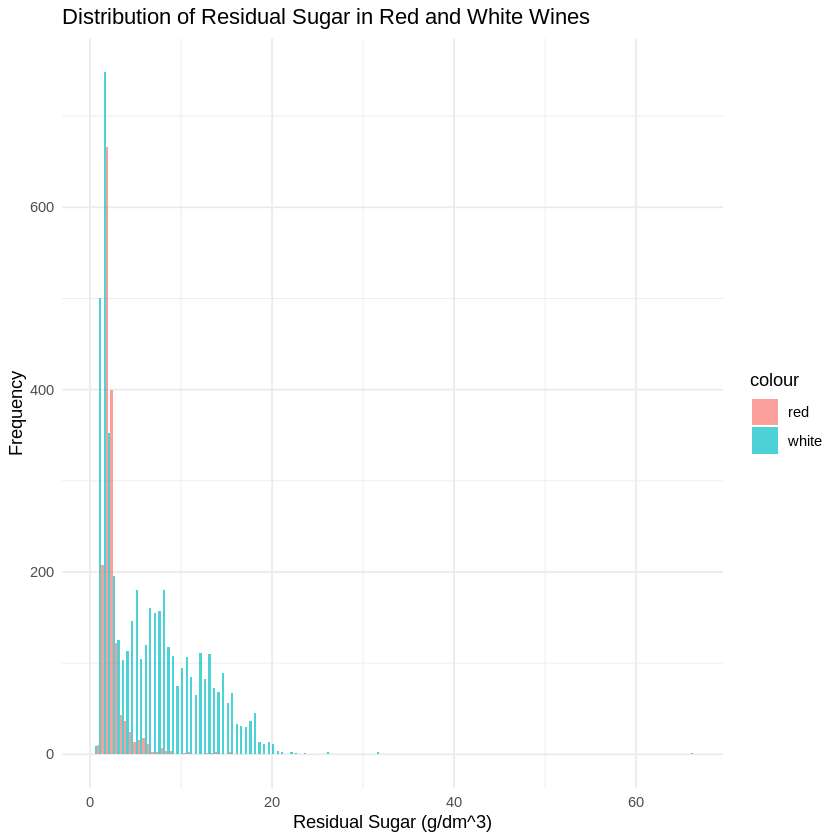

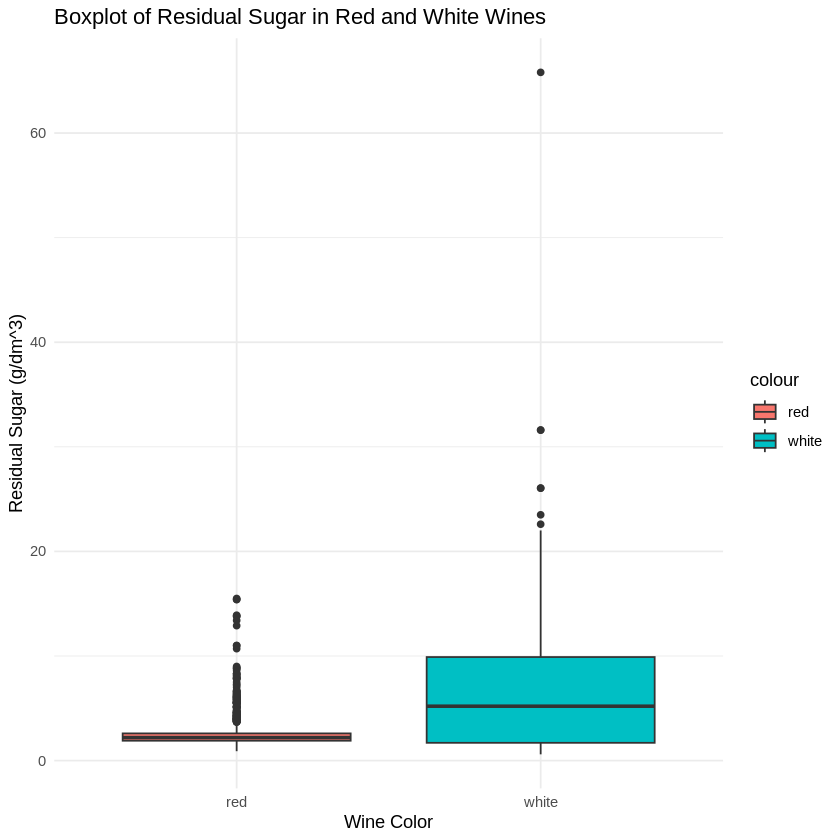

In [ ]:
# Histogram for Residual Sugar
ggplot(wine_data, aes(x = residual.sugar, fill = colour)) +
  geom_histogram(binwidth = 0.5, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Residual Sugar in Red and White Wines",
       x = "Residual Sugar (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Residual Sugar
ggplot(wine_data, aes(x = colour, y = residual.sugar, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Residual Sugar in Red and White Wines",
       x = "Wine Color", y = "Residual Sugar (g/dm^3)") +
  theme_minimal()

# Histogram for Citric Acid
ggplot(wine_data, aes(x = citric.acid, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Citric Acid in Red and White Wines",
       x = "Citric Acid (g/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Citric Acid
ggplot(wine_data, aes(x = colour, y = citric.acid, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Citric Acid in Red and White Wines",
       x = "Wine Color", y = "Citric Acid (g/dm^3)") +
  theme_minimal()

# Histogram for Sulphates
ggplot(wine_data, aes(x = sulphates, fill = colour)) +
  geom_histogram(binwidth = 0.05, alpha = 0.7, position = "dodge") +
  labs(title = "Distribution of Sulphates in Red and White Wines",
       x = "Sulphates (g(potassium sulphate)/dm^3)", y = "Frequency") +
  theme_minimal()

# Boxplot for Sulphates
ggplot(wine_data, aes(x = colour, y = sulphates, fill = colour)) +
  geom_boxplot() +
  labs(title = "Boxplot of Sulphates in Red and White Wines",
       x = "Wine Color", y = "Sulphates (g(potassium sulphate)/dm^3)") +
  theme_minimal()


**Figs. 1-6.** *A histograms and boxplots displaying the distributions of various potential input variables, coloured by wine colour.*

For a linear model, it is preferred to have as few variables as possible, while still having a useful model. This requires striking a good balance for the number of variables, along with the selection of the most important variables for our model. One way we can explore relevent variables is using a correlation heatmap. With this, we can see which variables have a high correlation with each other. Variables that are highly correlated with the response variable are typically important for the model. However, if a model has two variables which are highly correlated to each other, our model could be improved by removing the less important of the two.

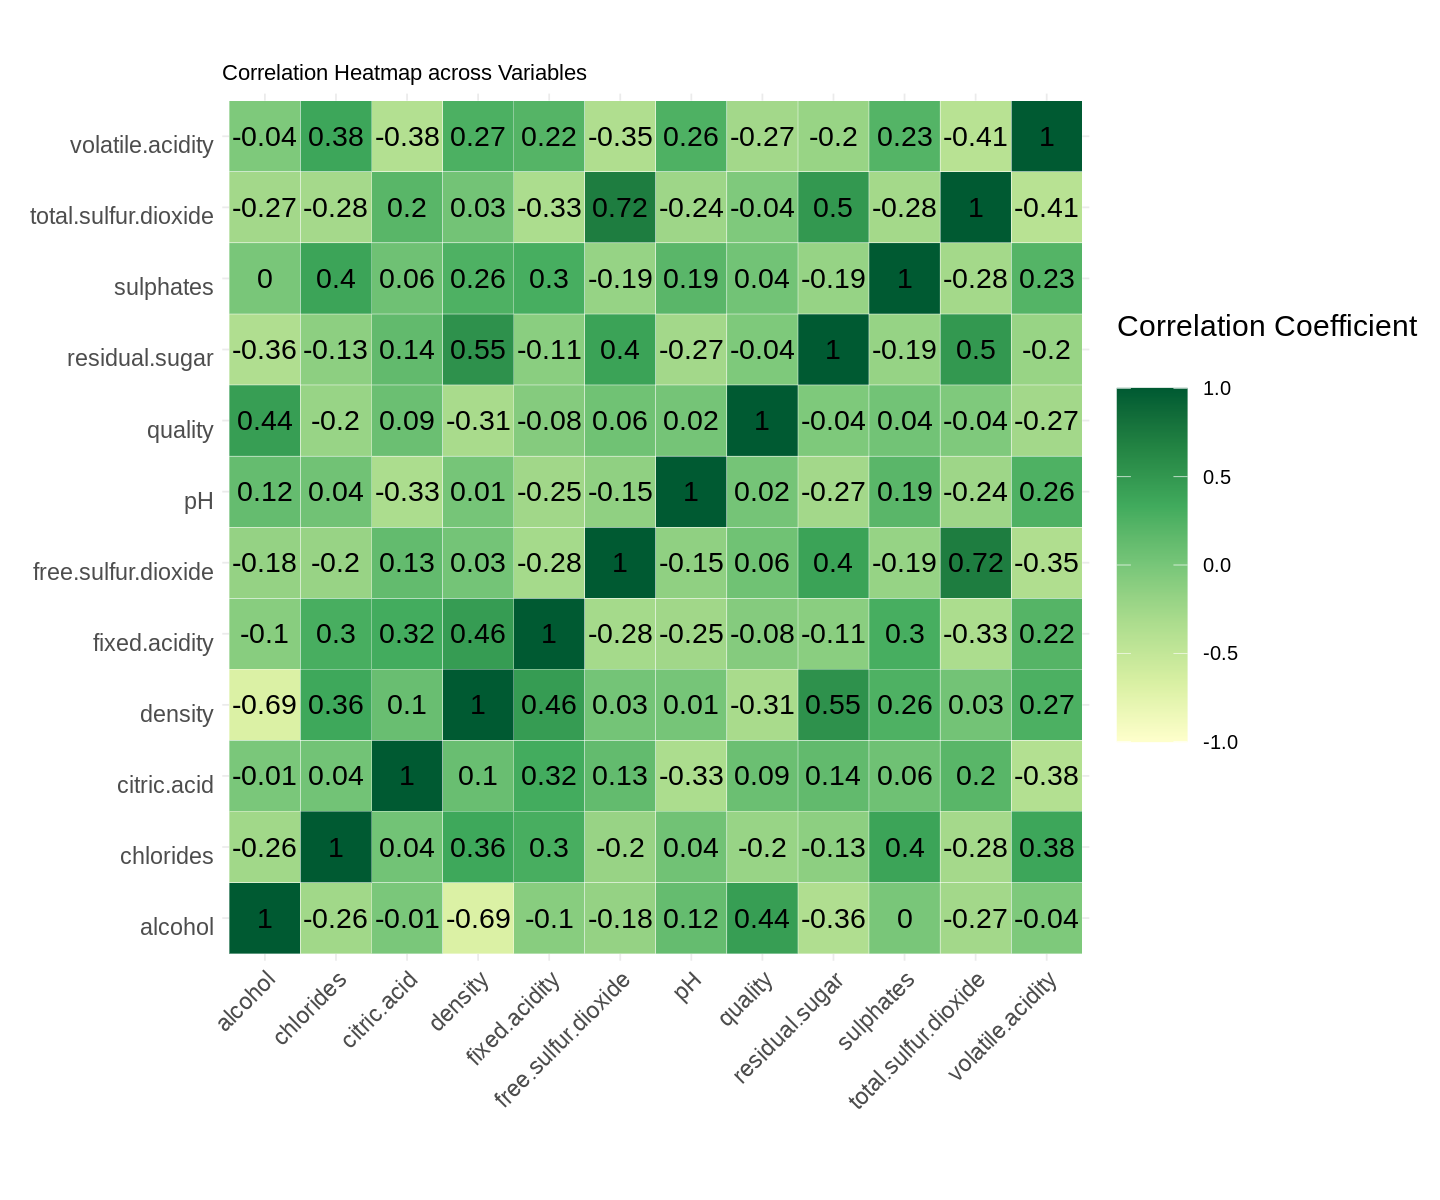

In [3]:
options(repr.plot.width = 12, repr.plot.height = 10) 
plot_corr_matrix_wine <- wine_data |>
    subset(select = -c(colour)) |>
    cor() |>
    as_tibble(rownames = 'var1') |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr") |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n", palette =  "YlGn", direction = 1, limits = c(-1,1)) +
    labs(title = "Correlation Heatmap across Variables", x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")) +
    coord_fixed() +
    geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)

plot_corr_matrix_wine

**Fig. 7.** *A correlation matrix plot describing the correlation coefficients between the many input variables.*

## Methodology

Our goal is to predict values of the response variable `alcohol` using an additive multiple linear regression (MLR) model with a minimum of three input variables. To select the number of input variables in our model, as well as which input variables to include, we will use a forward selection algorithm. A well-fitting model would have a minimal Mallow's $C_p$ statistic that is also approximately equal to the number of parameters, $p$. We want to select a model that fulfils this condition. After fitting the model, we can assess its efficacy by checking its adjusted coefficient of determination $R^2$. The $R^2$ value is the proportion of variance that the model explains, which implies that this is a measure of goodness-of-fit. When adjusted, this statistic also accounts for the number of parameters in the model to limit the inflation that including more parameters brings.

We will firstly fit a full model to compare to the model fitted with forward selection. We begin by splitting the data into two training/testing sets. We will train the model on our training set and test it by using the model to fit the testing set. Before we fit a reduced model, we must decide which variables to include and exclude; we will use forward selection to find the optimal number of variables and which variables to include. To test the out-of-sample performance of both the model selected via forward selection and the full model, we can check their respective root mean square errors (RMSE).

## Execution

We will start by splitting the dataset into two subsets: Set A will be the training set and Set B will be the testing set. 

In [4]:
# splitting data into testing and training sets
sample <- sample.int(nrow(wine_data), nrow(wine_data)*0.75, replace = FALSE)

seta <- wine_data[sample,]
setb <- wine_data[-sample,]

Next, we fit a full model. With this model, we will be able to test which variables are relevent in our model.

In [5]:
# fitting full model for both sets
full <- lm(alcohol~., seta)
summary(full)


Call:
lm(formula = alcohol ~ ., data = seta)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2922 -0.2963 -0.0343  0.2504 14.6468 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)           6.344e+02  6.202e+00  102.296  < 2e-16 ***
fixed.acidity         5.048e-01  1.023e-02   49.356  < 2e-16 ***
volatile.acidity      8.339e-01  6.607e-02   12.623  < 2e-16 ***
citric.acid           5.539e-01  6.375e-02    8.690  < 2e-16 ***
residual.sugar        2.248e-01  3.431e-03   65.533  < 2e-16 ***
chlorides            -1.144e+00  2.646e-01   -4.324 1.57e-05 ***
free.sulfur.dioxide  -3.805e-03  6.080e-04   -6.258 4.23e-10 ***
total.sulfur.dioxide -4.539e-04  2.563e-04   -1.771   0.0766 .  
density              -6.410e+02  6.341e+00 -101.099  < 2e-16 ***
pH                    2.556e+00  6.249e-02   40.902  < 2e-16 ***
sulphates             1.046e+00  6.120e-02   17.093  < 2e-16 ***
quality               1.061e-01  9.781e-03   10.851  < 2e-16 ***


Finding the variance inflation factors (VIF) of the variables of a model may help us find any signs of multicollinearity in a model. A variable with a high VIF (above 10) could mean that it has a strong correlation with other input variables in the model, and can likely be removed without much impact on the model. Below, we can see the VIF of each of the variables.

In [6]:
vif(full)

fixed.acidity     volatile.acidity          citric.acid 
            3.172625             2.177760             1.580309 
      residual.sugar            chlorides  free.sulfur.dioxide 
            5.068264             1.622847             2.206198 
total.sulfur.dioxide              density                   pH 
            3.948647             6.826269             1.872997 
           sulphates              quality               colour 
            1.487275             1.394329             6.122362

None of the VIF values appear to be too high, so we will not manually remove any potential input variables.

In [7]:
# calculating RMSE
rmse <- function(u,v) sqrt(mean((u-v)^2))

fullpred <- predict(full, setb)
fullrmse <- rmse(fullpred, setb$alcohol)
fullrmse

[1] 0.4624003

We will then run a forward selection to see which, and how many variables are needed for a good model.

In [8]:
# selecting variables
wine_fwd_sel <- regsubsets(alcohol~., wine_data, method = "forward", nvmax = 13)
fwd_sel_sum <- summary(wine_fwd_sel)
fwd_sel_sum_detail <-  tibble(
    n_input_variables = 1:12,
    RSS = fwd_sel_sum$rss,
    BIC = fwd_sel_sum$bic,
    Cp = fwd_sel_sum$cp)

In [9]:
fwd_sel_sum_detail
fwd_sel_sum$which

n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,4882.744,-4127.126,13200.93137
2,4278.948,-4975.952,10767.59602
3,3371.743,-6515.261,7110.50070
4,2598.100,-8199.923,3992.10577
5,1821.987,-10496.622,863.75315
6,1709.435,-10902.121,411.79010
7,1685.403,-10985.329,316.85853
8,1648.804,-11119.189,171.24129
9,1629.416,-11187.258,95.04408


,(Intercept),fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,quality,colourwhite
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
5,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
6,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
7,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE
8,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
9,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE


Looking at the first table, we can see that the best model is the one with 11 variables. It has the lowest $Cp$ value and has a value that is closest to the number of variables, $p$. Based on the second table, we see that if we were to choose 11 variables, the best model would use all the variables except `total.sulfur.dioxide`. We will now fit a model that omits this variable.

In [10]:
# fitting reduced model for both sets using variables selected above
reduced <- lm(alcohol~.-total.sulfur.dioxide, seta)
summary(reduced)


Call:
lm(formula = alcohol ~ . - total.sulfur.dioxide, data = seta)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3152 -0.2934 -0.0348  0.2499 14.7279 

Coefficients:
                      Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          6.373e+02  5.986e+00  106.472  < 2e-16 ***
fixed.acidity        5.065e-01  1.018e-02   49.745  < 2e-16 ***
volatile.acidity     8.175e-01  6.542e-02   12.495  < 2e-16 ***
citric.acid          5.451e-01  6.356e-02    8.576  < 2e-16 ***
residual.sugar       2.254e-01  3.414e-03   66.021  < 2e-16 ***
chlorides           -1.134e+00  2.646e-01   -4.288 1.84e-05 ***
free.sulfur.dioxide -4.436e-03  4.927e-04   -9.003  < 2e-16 ***
density             -6.440e+02  6.123e+00 -105.165  < 2e-16 ***
pH                   2.559e+00  6.246e-02   40.975  < 2e-16 ***
sulphates            1.038e+00  6.106e-02   17.006  < 2e-16 ***
quality              1.073e-01  9.761e-03   10.994  < 2e-16 ***
colourwhite         -1.110e+00  3.504e-02  -31.676  < 

In [11]:
# calculating RMSE
reducedpred <- predict(reduced, setb)
reducedrmse <- rmse(reducedpred, setb$alcohol)
reducedrmse

[1] 0.4614946

In [12]:
# calculating the difference in RMSE
fullrmse-reducedrmse

[1] 0.0009057673

As we can see, there is a negligible difference between the full model and the reduced model. Becuase, in general, a simpler model with less variables is preferred, we can say our reduced model is better.

The goal of the report is to predict the alcohol level of certain wines. Using our testing dataset, we can see how good our model is. Below is a scatterplot showing the differences between the predicted and actual alcohol levels for values in the testing set. We will plot the errors of the fitted values against the fitted values. We expect that the errors are centred at 0 and most errors are within a small range, since, with an adjusted $R^2$ of 0.8169, the model should explain most of the variation and fit the data well.

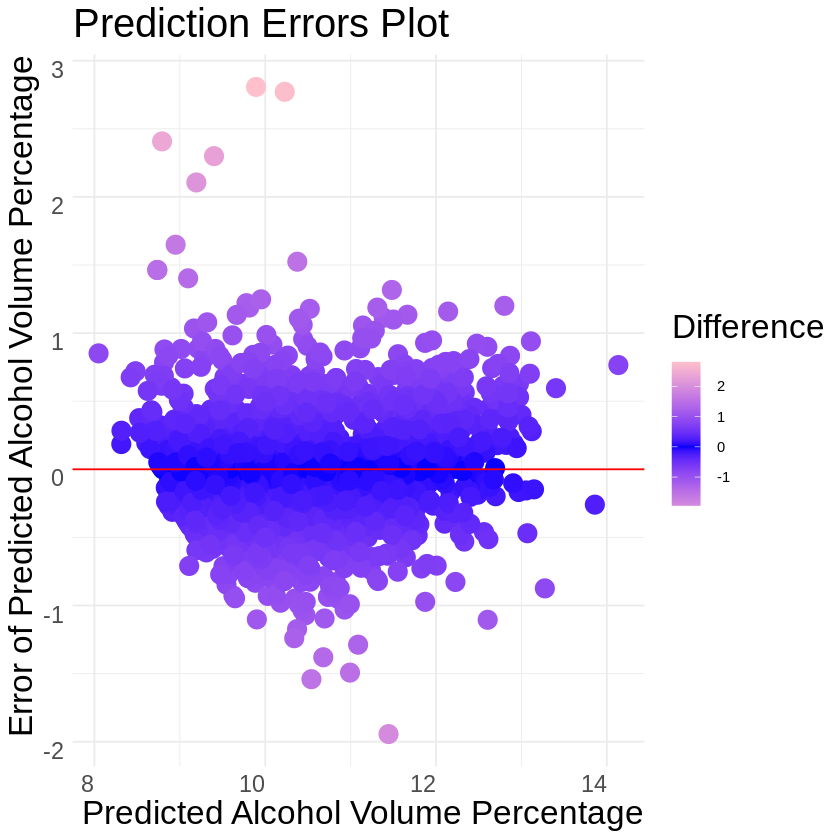

In [14]:
options(repr.plot.width = 7, repr.plot.height = 7)

wine_predict <- predict(reduced, setb)

# plotting an errors plot to observe the nature of the prediction errors produced by our model
comparison <- data.frame(pred = wine_predict, actual = setb$alcohol)
comparison$diffs <- comparison$actual - comparison$pred

errors_plot <- ggplot(comparison, aes(x = pred, y = diffs, colour = diffs)) +
    geom_point(size = 5) +
    geom_hline(yintercept = 0, color = "red") +
    scale_colour_gradient2(low = "pink", high = "pink", mid = "blue", name = "Difference") + 
    theme_minimal() +
    theme(
     axis.text.x = element_text(
         vjust = 1, size = 14, hjust = 1),
     axis.text.y = element_text(
         vjust = 1, size = 14, hjust = 1),
     title = element_text(
         vjust = 1, size = 20, hjust = 1)) +
    labs(
        title = "Prediction Errors Plot",
        x = "Predicted Alcohol Volume Percentage",
        y = "Error of Predicted Alcohol Volume Percentage"
    )
errors_plot

**Fig. 8.** *A scatterplot showing the difference between our model's predicted values compared to the actual value.*

We can see that most of the predicted values are accurate to around $\pm1\%$. To do a further analysis, we can explore one of the specific values in the testing dataset to understand more about the prediction.

In [15]:
# Get a random point in the dataset
to_predict <- sample_n(setb, 1)
pred <- predict(reduced, to_predict, se.fit = TRUE, interval = "prediction")
SEpred <- pred$residual.scale*sqrt((pred$se.fit/pred$residual.scale)^2+1)
data.frame(actual = to_predict$alcohol, prediction = pred$fit[1], SE = SEpred, lower = pred$fit[2], upper = pred$fit[3])

actual,prediction,SE,lower,upper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.6,10.19703,0.5108321,9.19557,11.19849


From this output, we can see that our prediction is quite close to the real alcohol value. To be more accurate, our 95% prediction interval captures the true alcohol value of that wine.

# Conclusion

In this project, we developed and evaluated predictive models for estimating the alcohol percentage in wines based on a range of physicochemical properties. Our approach included building both a full model using all available variables and a reduced model that excluded the least significant variable, total sulfur dioxide, based on forward selection.

The results demonstrated that both models performed relatively well, as indicated by the adjusted $R^2$ values and the Root Mean Squared Error (RMSE) differences. Interestingly, the reduction in the model's complexity by removing one variable did not significantly degrade the model's performance, suggesting that most predictors contribute meaningfully to the model's predictive power. 

Throughout the analysis, we utilized various visualizations, including histograms and box plots, to better understand the distribution of key variables like residual sugar, citric acid, and sulphates across red and white wines. These plots revealed differences in the distribution and variance of these properties between red and white wines, underscoring the complexity of using a combined dataset for prediction. We also observed that separate models for red and white wines could potentially yield more accurate and tailored predictions, making this an area worth exploring in future analysis.

To conclude, we fit a model using multiple linear regression that accurately predicts the percentage of alcohol in a bottle of wine from Northern Portugal, achieving the goal we set to begin this project. Our reduced model fit the data well, as evidenced by the adjusted $R^2$ value of 0.8169. The F-statistic of 1976 and near-zero p-value strongly suggest that this model is better than the intercept-only model.

# References

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.